In [34]:
%matplotlib notebook

import numpy as np
from numpy import loadtxt
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib as mpl
# https://stackoverflow.com/questions/46366461/matplotlib-3d-waterfall-plot-with-colored-heights
plt.style.use("support-files/qubit.mplstyle")
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual, FloatSlider, RadioButtons, Layout
import ipywidgets as widgets

In [39]:
x_max

1.2

In [41]:
x_min

0.7

array([-500.,    0.,  500., 1000., 1500.])

In [52]:
ax.get_xticks() * (x_max - x_min) / (len(data[0]) - 1)

array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6])

In [ ]:
ax.xaxis.set_ma

351
1001


<IPython.core.display.Javascript object>


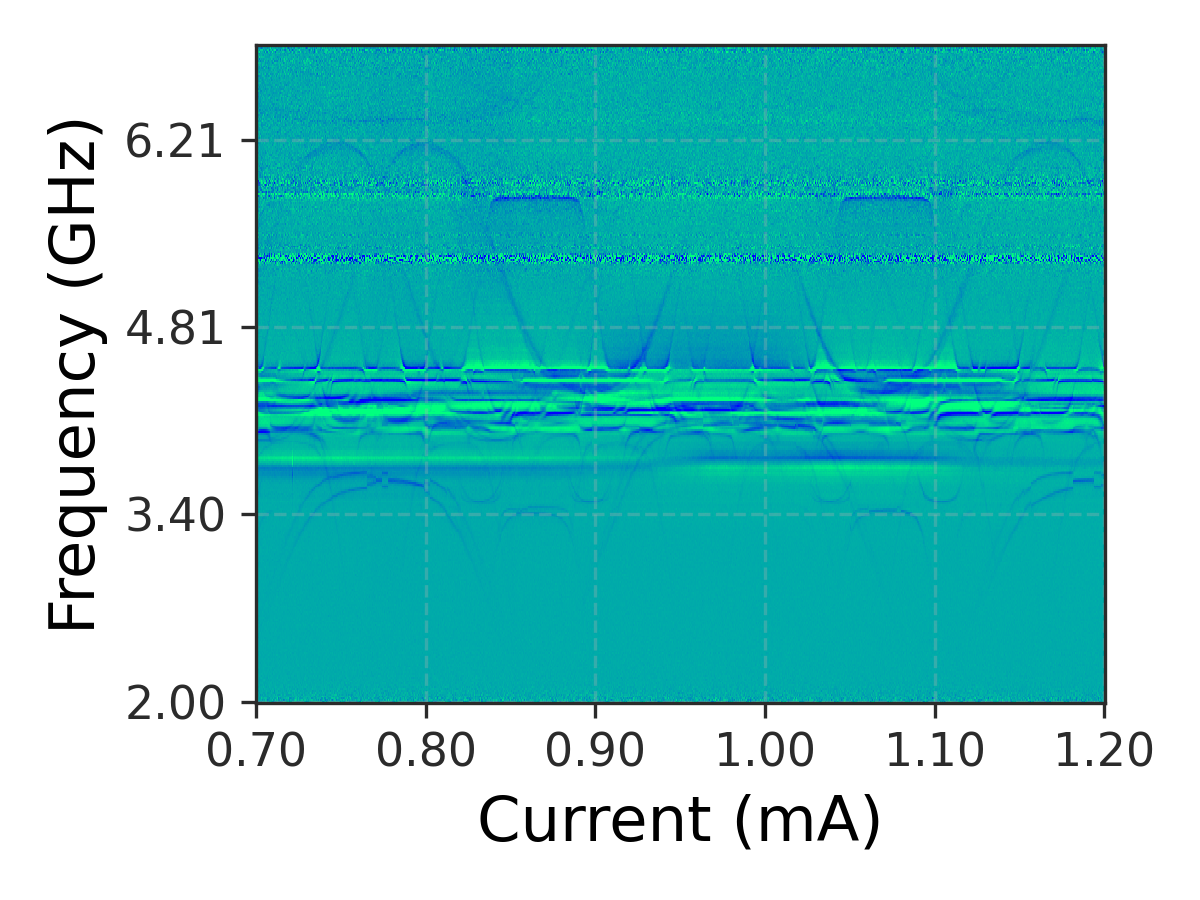

In [65]:
clim = [0, 1]
FILE = "a.txt"
data = np.array(loadtxt(FILE)).transpose()
with open(FILE, "r") as fin:
    first_line = fin.readline().split()
    x_min = float(first_line[1])
    x_max = float(first_line[2])
    
    second_line = fin.readline().split()
    y_min = float(second_line[1])
    y_max = float(second_line[2])
        

print(len(data))
print(len(data[0]))
#myFig1 = plt.figure(figsize=(20,20))
#plt.imshow(a)

# sx = ndimage.sobel(a, axis=0, mode='constant')
# sy = ndimage.sobel(a, axis=1, mode='constant')
# sob = np.hypot(sx, sy)

# # sx = ndimage.sobel(sob, axis=0, mode='constant')
# # sy = ndimage.sobel(sob, axis=1, mode='constant')

# # sob = np.hypot(sx, sy)

# # sx = ndimage.sobel(sob, axis=0, mode='constant')
# # sy = ndimage.sobel(sob, axis=1, mode='constant')

# # sob = np.hypot(sx, sy)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
# figure(figsize=(20,20))
im = ax.imshow(data,interpolation='nearest', aspect='auto',origin='lower',cmap='winter')
ax.set_xlabel("Current (mA)", fontsize=15)
# ax.tick_params(axis='x', labelsize=20)
ax.set_ylabel("Frequency (GHz)", fontsize=15)
# ax.tick_params(axis='y', labelsize=20)
im.set_clim(np.min(data), np.max(data))

ax.xaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(
    lambda x,p: 
        f"{(x * (x_max - x_min) / (len(data[0]) - 1) + x_min):.2f}")
) 
ax.yaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(
    lambda y,p: 
        f"{(y * (y_max - y_min) / (len(data[0]) - 1) + y_min):.2f}")
)

def update_imshow(clim_min: float, clim_max: float):
    im.set_clim(clim_min, clim_max)
    plt.draw()
    
clim_min_widget = FloatSlider(
    min=0, max=np.max(data), step=0.1,
    description="Min", value=clim[0],
    layout=Layout(width='90%')
)
clim_max_widget = FloatSlider(
    min=0, max=np.max(data), step=0.1,
    description="Min", value=clim[1],
    layout=Layout(width='90%')
)
ui = widgets.VBox([clim_min_widget, clim_max_widget])

plt.tight_layout()
plt.show()

In [66]:
out = widgets.interactive_output(
    update_imshow,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "clim_min": clim_min_widget,
        "clim_max": clim_max_widget,
    }
)  

display(ui, out)

Output()

In [67]:
plt.savefig("2021-02_CQPS-transmission-plot.svg")

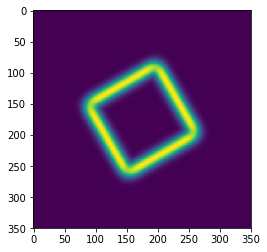

In [11]:
im = np.zeros((256, 256))

im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 30, mode='constant')
im = ndimage.gaussian_filter(im, 8)


sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')

sob = np.hypot(sx, sy)

plt.imshow(sob)
plt.show()

451
851


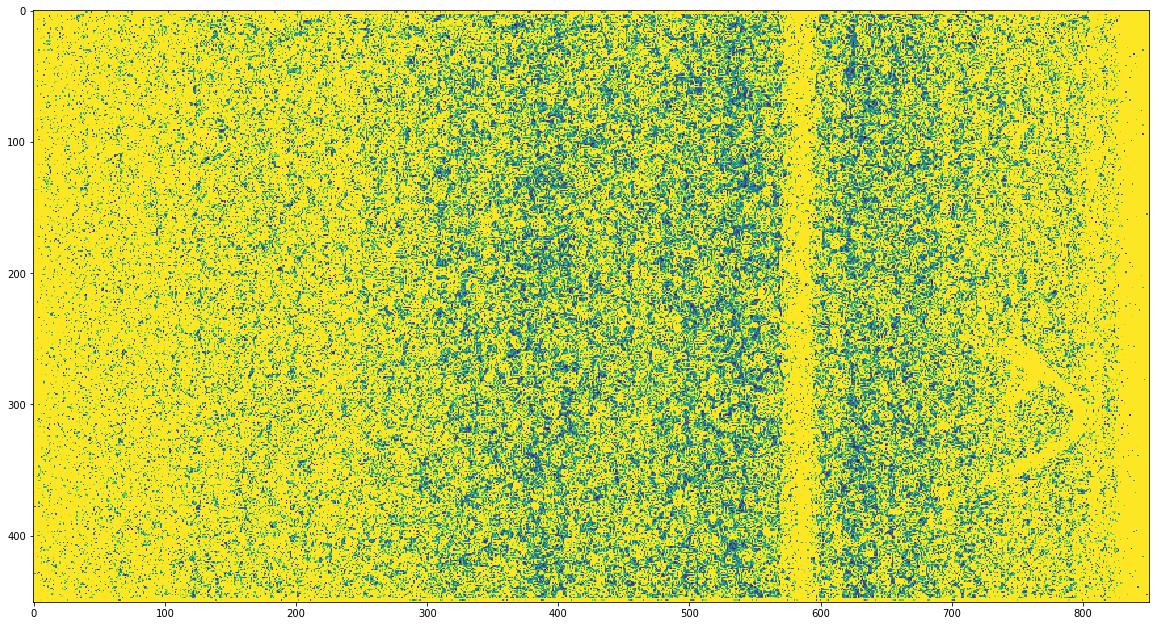

In [43]:
a = np.array(loadtxt("data.txt"))
print(len(a))
print(len(a[0]))
#myFig1 = plt.figure(figsize=(20,20))
#plt.imshow(a)

sx = ndimage.sobel(a, axis=0, mode='constant')
sy = ndimage.sobel(a, axis=1, mode='constant')

sob = np.hypot(sx, sy)

sx = ndimage.sobel(sob, axis=0, mode='constant')
sy = ndimage.sobel(sob, axis=1, mode='constant')

sob = np.hypot(sx, sy)

sx = ndimage.sobel(sob, axis=0, mode='constant')
sy = ndimage.sobel(sob, axis=1, mode='constant')

sob = np.hypot(sx, sy)
myFig2 = plt.figure(figsize=(20,20))
plt.imshow(sob, vmax=0.1, vmin= 0)
plt.show()